# Obdelava 47. vaje

## SILA MED PLOŠČAMA KONDENZATORJA

Gregor Žunič, 11.5.2020

## Uvod

Zaradi električnih privlačnih sil med nasprotnima nabojema se elektrodi kondenzatorja privlačita. To si ogledamo pri ploščatem kondenzatorju, ki ima plošči s ploščino $S$ v razmiku $d$. Kapaciteta kondenzatorja je tedaj $C = \frac{ε0S}{d}$. Pritisnimo na plošči napetost $U$. Sila $F$ med ploščama je enaka produktu naboja na prvi plošči in poljske jakosti, ki bi jo dobili samo z nabojem na drugi plošči.
$$ F = e_1 E_2 $$
pri tem je $e_1 = CU$ in $E_2 = \frac{U}{2d}$.

Z izrazom za kapaciteto sledi
$$ F = \frac{CU^2}{2d} = \frac{\epsilon_0SU^2}{2d^2} .$$

Tudi pri drugače oblikovanih elektrodah je sila sorazmerna s kvadratom napetosti. V statičnih voltmetrih izkoriščamo silo med elektrodama za merjenje napetosti.

## Naloga

Izmeri silo med ploščama danega kondenzatorja v odvisnosti od napetosti in določi električno konstanto!

## Obdelava in rezultati

In [21]:
from scipy.optimize import curve_fit
import scipy.constants as const
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, Image, IFrame
from negotovost import Negotovost

In [2]:
podatki = pd.read_csv('podatki.csv', comment='#')
print('m [g], U[V], F[N]')

m [g], U[V], F[N]


In [3]:
podatki['U'] = (podatki['U1']+podatki['U2']+podatki['U3'])/3
podatki['F'] = podatki['m']*const.g/1000
display(podatki)

,m,U1,U2,U3,U,F
0,0.1,310,340,310,320.000000,0.000981
1,0.3,730,680,780,730.000000,0.002942
2,0.5,790,960,970,906.666667,0.004903
3,0.7,1320,1260,1340,1306.666667,0.006865
4,0.9,1190,1260,1340,1263.333333,0.008826
5,1.1,1740,1450,1520,1570.000000,0.010787
6,1.3,1650,1490,1550,1563.333333,0.012749
7,1.5,1860,1740,1840,1813.333333,0.014710
8,1.7,1810,1820,1710,1780.000000,0.016671


In [4]:
def fit_func(x, a, b):
    return x*a+b

In [20]:
x = podatki['F']
y = podatki['U']**2

params = curve_fit(fit_func, x, y)
a,b = params[0]

# CALCULATE ERRORS FROM MATRIX
errs = np.sqrt(np.diag(params[1]))
print('a =', a,'V^2/N','+-',errs[0],'V^2/N', '\nb =', b,'+-',errs[1])

k = (a,errs[0])

a = 208457942.58806527 V^2/N +- 15884683.466709748 V^2/N 
b = -48044.20484897192 +- 161636.67779317865


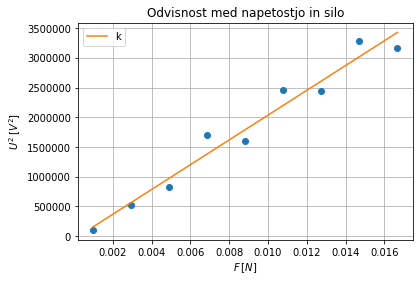

In [22]:
y_fit = fit_func(x, a, b)

plt.plot(x, y, 'o')
plt.plot(x, y_fit, label=r'k')

plt.title(r'Odvisnost med napetostjo in silo')
plt.ylabel(r'$ U^2 \; [V^2] $')
plt.xlabel(r'$F \: [N]$')

plt.grid()
plt.legend()
plt.show()

Koeficient na grafu je $ (2.09 \pm 0.16) \cdot 10^{8} \: \frac{V^2}{N}$

Sedaj lahko enačbe obrnemo:

$$ F = \frac{\epsilon_0SU^2}{2d^2} $$

$$ \epsilon_0 = \frac{F2d^2}{SU^2} $$

$$ \epsilon_0 = \frac{2d^2}{\pi r^2 k} $$

In [31]:
d = (0.0051,0.0001) #m
r = (0.19/2,0.001) #m

data = [
    ('k',k[0],k[1],'V^2/m'),
    ('d',d[0],d[1],'m'),
    ('r',r[0],r[1],'m'),
    ]

function = '2*d^2/(pi*r^2*k)'

negotovost = Negotovost(data,function,floating_points=3)
negotovost.draw_table(units=r'As/Vm',text_size=16,variable='\epsilon_0')

<IPython.core.display.Latex object>

,$\frac{\partial \epsilon_0}{\partial x_i}$,$\sigma_i$,$\sigma_i \cdot \frac{\partial \epsilon_0}{\partial x_i} $
$k$,$- \frac{2 d^{2}}{\pi k^{2} r^{2}}$,$1.588E07\; V^2/m$,$-6.707E-13\;As/Vm$
$d$,$\frac{4 d}{\pi k r^{2}}$,$1.000E-04\; m$,$3.452E-13\;As/Vm$
$r$,$- \frac{4 d^{2}}{\pi k r^{3}}$,$1.000E-03\; m$,$-1.853E-13\;As/Vm$


<IPython.core.display.Latex object>

Izračunana konstanta iz podatkov je
$$ \epsilon_0 = (8.80 \pm 0.78) \cdot 10^{-12} \: \frac{As}{Vm} $$

To je zelo blizu električni konstanti. To razliko bi lahko mogoče celo pripisali, da je drugačna zaradi medija, vendar je bolj verjetna zgolj merska napaka.

In [27]:
print(const.epsilon_0)

8.854187817620389e-12


In [33]:
d = np.sqrt( const.epsilon_0 * np.pi * r[0]**2 * k[0] /2)
print(d)

0.005115253160996202


Razdalja izračunana v obratno smer je skoraj enaka.